In [ ]:
## Shree Ganeshya Namaha 

from sklearn 

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
x= iris.data
y= iris.target
labels= iris.target_names

In [2]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

([], [])

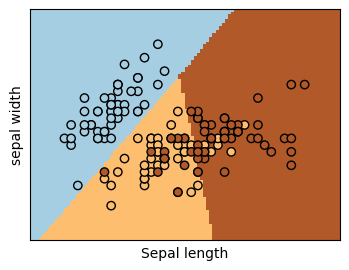

In [12]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
# import matplotlib as plt 
X1=x[:,:2]
logreg = LogisticRegression(C=1e5)
logreg.fit(X1,y)

_,ax = plt.subplots(figsize=(4,3))
DecisionBoundaryDisplay.from_estimator(
    logreg,X1,cmap=plt.cm.Paired,ax=ax,response_method="predict",
    plot_method="pcolormesh",
    xlabel="Sepal length",
    ylabel= "sepal width",
    eps=0.5
    
)
plt.scatter(X1[:,0],X1[:,1],c=y,edgecolors='k',cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit(x).transform(x)
print(str(pca.explained_variance_ratio_))
plt.figure()
colors = ["navy","turquoise","darkorg"]

[0.92461872 0.05306648]


<Figure size 640x480 with 0 Axes>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.50,random_state=1
                                                  )
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred)*100)

96.03174603174604


In [36]:
y_train


array([1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0,
       2, 0])

ValueError: x and y must be the same size

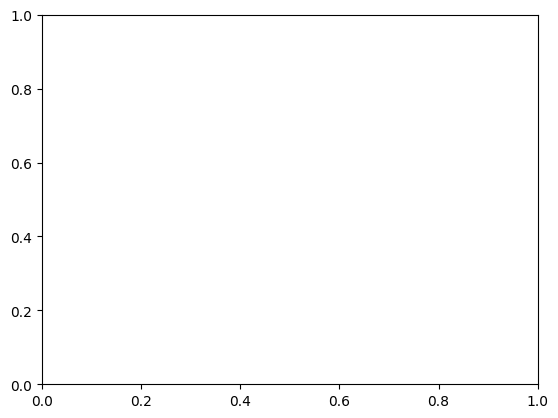

In [35]:
plt.scatter(y_train,y_pred,c=y,edgecolors='k',cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())

In [ ]:
!pip install seaborn

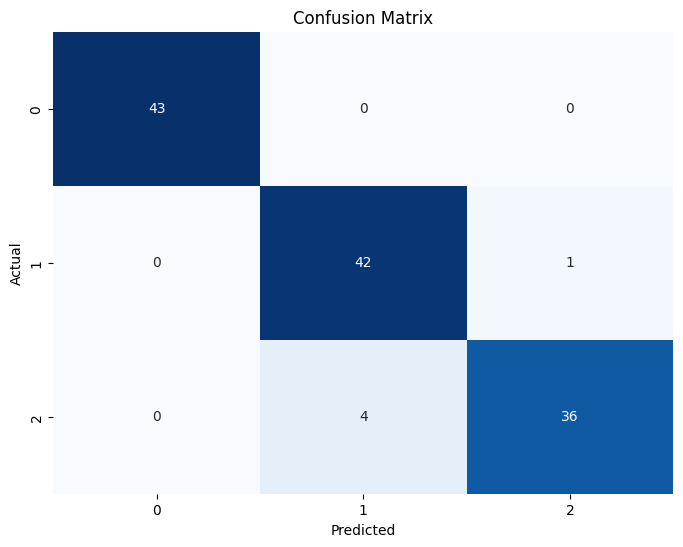

In [24]:
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ValueError: x and y must be the same size

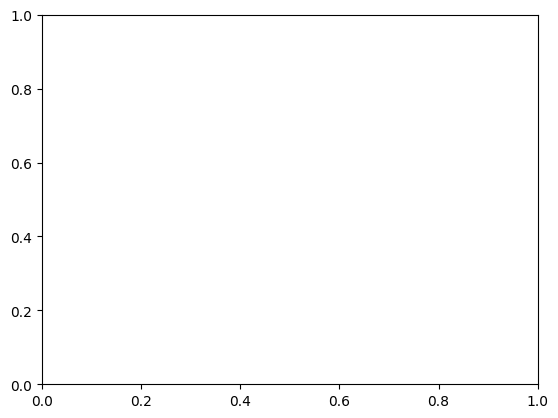

In [22]:
plt.scatter(X_train,y_train,c=y,edgecolors='k',cmap=plt.cm.Paired)

In [39]:
!pip install graphviz

                                              0.0/47.1 kB ? eta -:--:--
     --------------------------               30.7/47.1 kB 1.3 MB/s eta 0:00:01
     ---------------------------------      41.0/47.1 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 47.1/47.1 kB 466.9 kB/s eta 0:00:00


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text,export_graphviz
import graphviz
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix,classification_report

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

predict = model.predict(X_test)

print(metrics.accuracy_score(predict,y_test))

con_mr = confusion_matrix(y_test,predict)
print(con_mr)
cls_dt = classification_report(y_test,predict,target_names=labels)
r = export_text(model,feature_names=['SepalLengthCm','sepalWidthCm',
                                     'PetalLengthCm','PetalWidthCm'])
print(r)

0.9523809523809523
[[43  0  0]
 [ 0 42  1]
 [ 0  5 35]]
|--- PetalWidthCm <= 1.75
|   |--- PetalWidthCm <= 0.70
|   |   |--- class: 0
|   |--- PetalWidthCm >  0.70
|   |   |--- class: 1
|--- PetalWidthCm >  1.75
|   |--- class: 2



In [49]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [50]:
dot_data = export_graphviz(model,out_file=None)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [65]:
import sklearn.neural_network
ner = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(10,10),
                                           activation='relu',random_state=None)

ner.fit(X_train,y_train)
y_pred = ner.predict(X_test)
print(y_pred)
print(metrics.accuracy_score(predict,y_test))

con_mr = confusion_matrix(y_test,predict)
print(con_mr)
cls_dt = classification_report(y_test,y_pred,target_names=labels)
print(cls_dt)
# r = export_text(model,feature_names=['SepalLengthCm','sepalWidthCm',]
                      

[2 2 0 2 0 2 2 2 0 2 2 2 2 0 0 2 2 0 0 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 0 2 2 2 0 2 0 2 2 0 2 2 2
 2 2 0 2 2 2 0 2 2 2 0 0 0 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 0 0 2 0 0 2 2 0
 0 0 2 0 2 0 2 2 0 2 2 2 0 2 0]
0.9523809523809523
[[43  0  0]
 [ 0 42  1]
 [ 0  5 35]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        43
  versicolor       0.00      0.00      0.00        43
   virginica       0.48      1.00      0.65        40

    accuracy                           0.66       126
   macro avg       0.49      0.67      0.55       126
weighted avg       0.49      0.66      0.55       126



c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pred

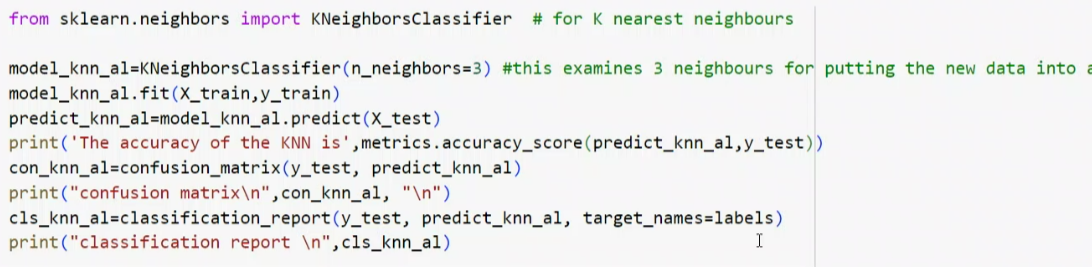

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn_al = KNeighborsClassifier(n_neighbors=3)
model_knn_al.fit(X_train,y_train)
predict_knn_al= model_knn_al.predict(X_test)
con_knn_al=confusion_matrix(y_test,)


In [1]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier().fit(X_train,y_train)

NameError: name 'X_train' is not defined

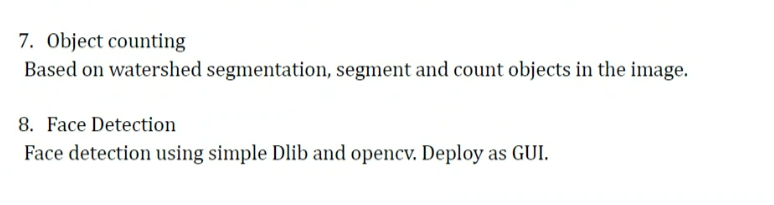

In [2]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl (377.0 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl (3.0 MB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl (127 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached grpcio-1.63.0-cp311-cp311-win_amd64.whl (3.9 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl (1.5 MB)
  Using cached rich-13.7.1-py3-none-an

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\markdown_py.exe' -> 'c:\\Python311\\Scripts\\markdown_py.exe.deleteme'



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [1]:
mnist = tf.keras.datasets.mnist

NameError: name 'tf' is not defined